In [1]:
import matplotlib.pyplot as plt
import datetime


In [2]:
pip install mplhep

Note: you may need to restart the kernel to use updated packages.


In [2]:
import mplhep as hep

In [3]:
plt.style.use([hep.style.ROOT])

In [4]:
import common_tools as ct

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


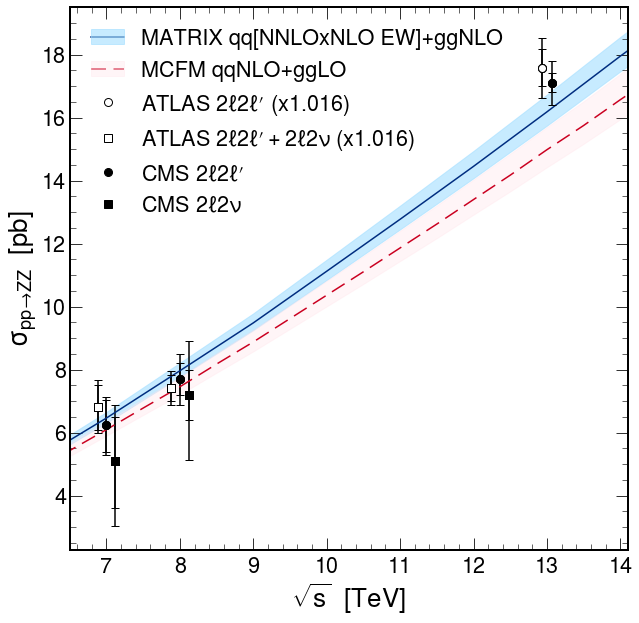

In [5]:
(x,y,systup, systdown, statup, statdown) = ct.plotDataFromFile("data/ZZ_nnlo_values.txt")
nnlo = plt.plot(x,y,'#002D80')
nnlo_fill = plt.fill_between(x, [i+e for i,e in zip(y, systup)], [i-e for i,e in zip(y, systdown)], color='#A3DFFF',alpha=.6)

(x,y,systup, systdown, statup, statdown) = ct.plotDataFromFile("data/ZZ_scan_values_removebr_fixedscale.txt")
nlo = plt.plot(x,y, '#ca0020', dashes=[10, 5,], label="")
nlo_fill = plt.fill_between(x, [i+e for i,e in zip(y, systup)], [i-e for i,e in zip(y, systdown)], color='#FFE6EC',alpha=.4)

atlas_4l = ct.plotData(*ct.plotDataFromFile("data/ZZ_ATLAS_measurements.txt"), label=r"ATLAS $2\ell2\ell\prime$ (x1.016)")
atlas_2l2v = ct.plotData(*ct.plotDataFromFile("data/ZZ_2l2v_ATLAS_measurements.txt"), label=r"ATLAS $2\ell2\ell\prime+2\ell2\nu$ (x1.016)")
cms_4l = ct.plotData(*ct.plotDataFromFile("data/ZZ_CMS_measurements.txt"), label=r"CMS $2\ell2\ell\prime$")
cms_2l2v = ct.plotData(*ct.plotDataFromFile("data/ZZ_2l2v_CMS_measurements.txt"), label=r"CMS $2\ell2\nu$")

plt.xlim(6.5,14.1)
plt.ylabel(r"$\sigma_{\mathrm{pp}\to\mathrm{ZZ}}$  [pb]")
plt.xlabel("$\sqrt{s}$  [TeV]")

plt.legend([(nnlo[0], nnlo_fill), (nlo[0], nlo_fill), atlas_4l[0], atlas_2l2v[0], cms_4l[0], cms_2l2v[0]], 
           ["MATRIX qq[NNLOxNLO EW]+ggNLO", "MCFM qqNLO+ggLO",
            r"ATLAS $2\ell2\ell\prime$ (x1.016)",
            r"ATLAS $2\ell2\ell\prime+2\ell2\nu$ (x1.016)",
            r"CMS $2\ell2\ell\prime$",
            r"CMS $2\ell2\nu$"
], loc='upper left')

fig = plt.gcf()
fig.savefig("ZZCrossSection_{:%Y-%m-%d}.pdf".format(datetime.datetime.today()))
fig.show()